# Implementation of softmax for Linear Classification

Defining variables   
- $\textbf{C}_{\text{obs}}$ is a $n_c \times n$ labels matrix 
- $\textbf{W}$ is a $n_c \times n_f$ weights and biases matrix 
- $\textbf{Y}$ is a $n_f \times n$ observation matrix 

Cross entropy is defined as

\begin{gather}
E(\textbf{C}_{\text{obs}}, \textbf{S})=-\frac{1}{n}\textbf{e}^\top_{n_c}(\textbf{C}_{\text{obs}} \odot \textbf{S}) \textbf{e}_n + 
\frac{1}{n}\log(\textbf{e}^\top_{n_c}\exp(\textbf{S}))\textbf{e}_n
\end{gather}

In [156]:
import autograd.numpy as np
import autograd
import matplotlib.pyplot as plt

import unittest

In [457]:
def softmaxFun(W, Y, C):
    """
    Computes softmax objective function and necessary components to optimize
    
    Parameters:
        W -- the weights of the classifier as a vector (n_c * n_f) x 1. Even though the weights are 
             really used as a matrix, a vector makes the gradient and Hessian calculations simpler.
        Y -- the features, including bias if needed (n_f x n)
        C -- the labels, (n_c x n)
    
    Returns:
        E -- the cross entropy for estimate W
        dE -- the gradient as a vector of length (n_c * n_f)
        d2E -- a function with one input that computes a MVP with the Hessian
    """
    n_f = Y.shape[0]
    n_c, n = C.shape
    
    # The "C" parameter to the order arg tells reshape to follow C-index, or fill in the ndarray along the rows
    # The "F" argument would reshape following Fortran index, so filling in the ndarray along the columns. MATLAB
    W_mat = np.reshape(W, newshape = (n_c, n_f), order = "C")
    S = W_mat @ Y
    
    unit_nc = np.ones((n_c, 1))
    unit_n = np.ones((n, 1))
    
    # Cross-entropy calculation
    def cross_entropy(W):
        S = W @ Y
        s = np.max(S, axis=0)
        S = S - s
        return -(1/n) * (unit_nc.T @ np.multiply(C, S) @ unit_n) + (1/n) * np.log(unit_nc.T @ np.exp(S)) @ unit_n
    
    # Gradient and Hessian-vector product function
    def gradient(W):
        g = autograd.grad(cross_entropy)
        return np.reshape(g(W), newshape = (n_c*n_f, 1), order = "C")
    
    # Hessian-vector product
    E = np.asscalar(cross_entropy(W_mat))
    dE = gradient(W_mat)
    def d2E(v):
        return autograd.grad(np.vdot(gradient, v))
        
    return E, dE, d2E

### Testing derivatives

\begin{gather}
E(W+hD)-E(W)-htr(D^TE(W))
\end{gather}

In [ ]:
# Y and C are constant. So calculate softmax for 

def f(W):
    return softmaxFun(W, Y, C)[0]

def f_grad(W):
    return softmaxFun(W, Y, C)[1]

def derivativeTest(f, f_grad, w, d):
    """
    Conducts the derivative test based on Taylor's Theorem. Valid for 
    univariate and multivariate functions.

    Parameters
        f -- Original function to be evaluated
        f_grad -- Function for the derivative of f
        w -- Fixed constant
        h -- step size
        d -- direction to move w in
    """
    h = np.array([2e-10, 2e-8, 2e-7, 2e-6, 2e-5, 2e-4, 2e-3, 2e-1, 1])

    d1 = f(w+h*d)-f(w)
    d2 = f(w+h*d)-f(w)-f_grad(w)*(h*d)

    return h, d1, d2

### Softmax tests to perform
1. Scalar result for cross entropy always
2. Result does not depend on order of columns of $\textbf{Y}$
3. Result should be the same for both ($\textbf{y, c}$) or $(\textbf{ye}^\top, \textbf{ce}^\top)$
4. $\textbf{W}=\alpha\textbf{I}$ and $\textbf{Y=C}$ don't cause overflow for any $\alpha$

Text(0.5, 1.0, 'Test Problem: Linearly Separable classes')

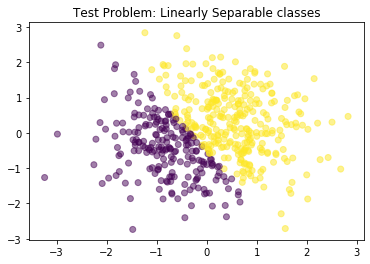

In [370]:
n = 500
n_c = 2
n_f = 2

a = 3; b = 2
Y = np.random.normal(0,1,(n_f, n))
C = a*Y[0,:] + b*Y[1,:] + 1
C[C>0] = 1; C[C<0] = 0
C_mat = np.array([C, 1-C])
W = np.zeros((n_c, n_f))

plt.scatter(Y[0,:], Y[1,:], alpha=0.5, c=C)
plt.title("Test Problem: Linearly Separable classes")